<a href="https://colab.research.google.com/github/Cato-2/spotify-clone/blob/master/IA_Reconocimiento_de_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTELIGENCIA ARTIFICIAL. OMV - AI 2023-I**

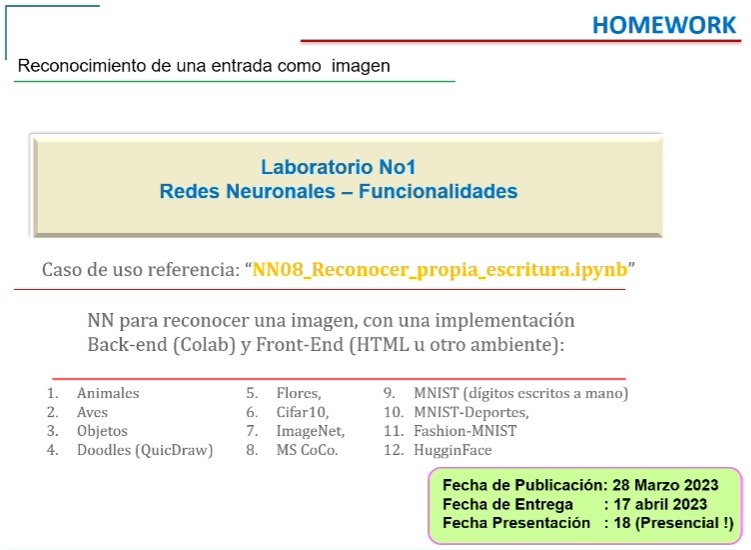

# **Integrantes :** 
---
    - Catalina Ponce Puebla
    - Marcelo Tapia Riquelme







# **1. Bibliotecas y Métodos**

In [ ]:
from IPython.display import display, HTML

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

"IPython.display": Es un módulo que proporciona funciones para mostrar contenido interactivo en el notebook de Jupyter, como HTML, imágenes y videos.

"numpy" (abreviado como np): Es una biblioteca de Python utilizada para realizar cálculos numéricos y matemáticos de manera eficiente. Proporciona matrices multidimensionales, funciones matemáticas y herramientas para trabajar con arreglos.

"tensorflow" (abreviado como tf): Es una biblioteca de Python de código abierto desarrollada por Google para realizar cálculos numéricos y matemáticos. Se utiliza principalmente para construir y entrenar modelos de aprendizaje automático, especialmente para tareas de visión por computadora y procesamiento del lenguaje natural.

"keras": Es una biblioteca de alto nivel de TensorFlow utilizada para construir y entrenar modelos de aprendizaje automático de manera eficiente.

"datasets": Es un módulo de Keras que proporciona funciones para cargar conjuntos de datos populares utilizados en el aprendizaje automático, como CIFAR-10 y MNIST.

"layers": Es un módulo de Keras que proporciona una variedad de capas para construir modelos de aprendizaje automático, como capas convolucionales, capas de agrupamiento y capas densas.

"models": Es un módulo de Keras que proporciona funciones para construir modelos de aprendizaje automático, como modelos secuenciales y modelos funcionales.

"regularizers": Es un módulo de Keras que proporciona funciones para agregar regularización a los modelos de aprendizaje automático, como la regularización L1 y L2.

"ImageDataGenerator": Es una clase de Keras que proporciona una forma de generar lotes de imágenes aumentadas en tiempo real durante el entrenamiento de modelos de aprendizaje automático.

"EarlyStopping": Es una clase de Keras que proporciona una forma de detener el entrenamiento de modelos de aprendizaje automático temprano si no se observa mejora en la métrica de evaluación.

"to_categorical": Es una función de Keras que convierte etiquetas enteras en una representación codificada en un vector de números binarios.

"matplotlib.pyplot" (abreviado como plt): Es una biblioteca de Python utilizada para crear visualizaciones y gráficos. Se utiliza comúnmente para mostrar imágenes y gráficos en el aprendizaje automático.

### Carga de Drive para mostrar frontend


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/Shareddrives/IA"

Mounted at /content/drive


from google.colab import drive: Importa el módulo drive de la biblioteca google.colab, que proporciona funciones para acceder a Google Drive desde Colaboratory.

drive.mount('/content/drive'): Monta la unidad de Google Drive en Colaboratory y muestra una URL en la salida del notebook. El usuario debe hacer clic en la URL, autorizar el acceso a su cuenta de Google y copiar un código de autenticación, que se debe pegar en un campo de entrada en el notebook.

path = "/content/drive/Shareddrives/IA": Establece la variable path como la ruta de acceso a una carpeta en Google Drive. Esta carpeta puede contener datos de entrenamiento y modelos de aprendizaje automático que se utilizarán en el notebook.

# **2. Carga de datos**

Se utilizó un dataset llamado 'Cifar10' el cual se obtiene de la libreria **TensorFlow Datasets**

In [ ]:
# Carga y normalización del conjunto de datos CIFAR-10 (entrenamiento y pruebas)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

print(train_images.shape)

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)


(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data(): La función load_data() del módulo datasets de Keras se utiliza para cargar el conjunto de datos CIFAR-10. Este conjunto de datos contiene 50,000 imágenes de entrenamiento y 10,000 imágenes de prueba, cada una de 32x32 píxeles, que representan 10 clases diferentes de objetos (por ejemplo, aviones, automóviles, pájaros, gatos, ciervos, perros, ranas, caballos, barcos y camiones). Las imágenes de entrenamiento y prueba se almacenan en las variables train_images y test_images, respectivamente. Las etiquetas correspondientes (números enteros que representan las 10 clases) se almacenan en las variables train_labels y test_labels.

train_images, test_images = train_images / 255.0, test_images / 255.0: Las imágenes se normalizan dividiéndolas por 255.0, lo que produce valores de píxel en el rango [0, 1]. Esto ayuda a que el modelo de aprendizaje automático aprenda mejor las características de las imágenes y a que el entrenamiento sea más eficiente.

print(train_images.shape): Imprime la forma (shape) del arreglo train_images, que contiene las imágenes de entrenamiento cargadas. La forma es una tupla que indica la cantidad de imágenes en el conjunto, la altura y la anchura de cada imagen y la cantidad de canales de color (en este caso, 3 para rojo, verde y azul). En este caso, la forma es (50000, 32, 32, 3), lo que significa que hay 50,000 imágenes de entrenamiento, cada una de 32x32 píxeles y 3 canales de color.

# **3. Normalización**
El tamaño de las imagenes son todas iguales, pero igualmente como parte del proceso se tiene que normalizar los datos.


In [ ]:
# Creación de una lista de nombres de clases para mostrar en las etiquetas
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Se crea una lista de nombres de clases que se utilizarán para etiquetar las imágenes en el conjunto de datos CIFAR-10. Cada nombre en la lista se corresponde con una de las 10 clases de objetos que contiene el conjunto de datos, en el siguiente orden:

[airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck]

Cada elemento de la lista se almacena como una cadena de caracteres y se accede mediante su índice en la lista. Esta lista se utilizará más adelante para etiquetar las imágenes en los gráficos y visualizaciones de datos. La creación de esta lista es importante para darle un significado semántico a las etiquetas numéricas que se utilizan en el conjunto de datos CIFAR-10 y para que los usuarios puedan entender mejor los resultados del modelo de aprendizaje automático.

# **4. Visualización**

Para comprobar la carga de datos, se visualizan 9 imagenes del dataset 'cifra10'

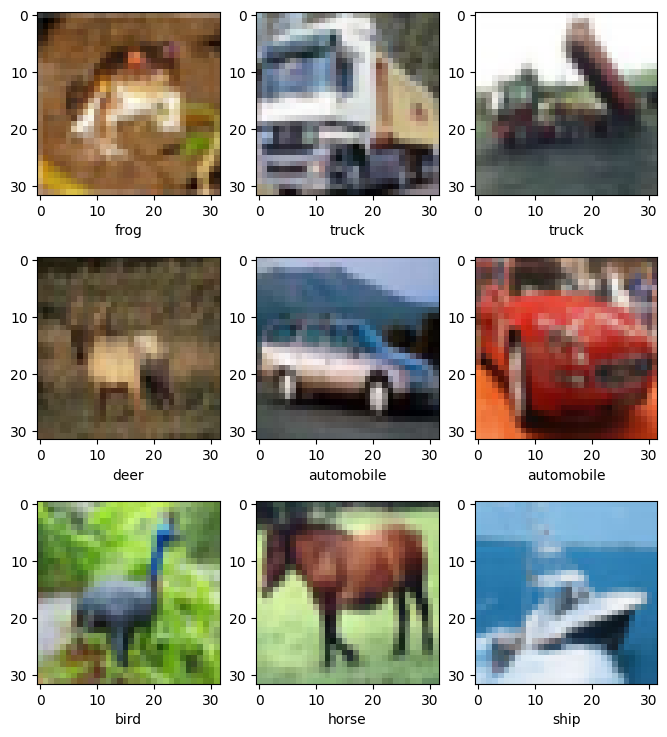

In [ ]:
# Utilización de la librería Matplotlib para generar una visualización de las primeras nueve imágenes de un conjunto de entrenamiento de imágenes
plt.figure(figsize=(8,9))
for i in range (9):
  plt.subplot(330 + 1 + i) 
  plt.imshow(train_images[i], cmap='gray')  
  plt.xlabel(class_names[int(train_labels[i])])
plt.show()

Se muestra una grilla de imágenes que corresponden a un subconjunto de las imágenes de entrenamiento del conjunto de datos CIFAR-10.

La primera línea establece el tamaño de la figura que se utilizará para mostrar las imágenes, con una anchura de 8 pulgadas y una altura de 9 pulgadas.

El siguiente bloque de código utiliza un bucle for para iterar sobre las primeras 9 imágenes en el conjunto de datos de entrenamiento (train_images), y para cada una de estas imágenes se realiza lo siguiente:

Se define un área rectangular en la figura para mostrar la imagen. En este caso, se utilizan subplots para crear una grilla de 3 filas y 3 columnas, y se asigna un número de posición de 1 a 9 a cada subplot. Por lo tanto, la posición de cada subplot en la grilla se determina sumando 330 al número de iteración del bucle for, es decir, las primeras tres subplots se asignan a las posiciones 331, 332 y 333, las siguientes tres subplots a las posiciones 334, 335 y 336, y así sucesivamente.

Se muestra la imagen en la posición definida utilizando la función imshow() de matplotlib. El argumento cmap='gray' se utiliza para especificar la paleta de colores que se utilizará para mostrar la imagen. En este caso, se utiliza una escala de grises.

Se agrega una etiqueta a la imagen utilizando la función xlabel() de matplotlib. La etiqueta se define como el nombre de la clase correspondiente a la imagen, que se obtiene a partir del conjunto de etiquetas de entrenamiento (train_labels). La etiqueta se convierte de un valor numérico a una cadena de caracteres utilizando la lista de nombres de clases creada anteriormente.

Finalmente, se muestra la figura que contiene las imágenes y las etiquetas utilizando la función show() de matplotlib.

# **5. Modelo y compilación de la red** 

In [ ]:
# Convertir las etiquetas a codificación one-hot
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

El código se encarga de convertir las etiquetas de las imágenes en una codificación "one-hot". La codificación "one-hot" es una representación común para las etiquetas en problemas de clasificación multiclase, en la cual cada etiqueta se convierte en un vector binario de longitud igual al número de clases, donde todas las posiciones están en cero excepto la posición correspondiente a la clase a la que pertenece la imagen, que se establece en uno.

En el caso específico del código, se convierten tanto las etiquetas del conjunto de entrenamiento como las del conjunto de pruebas a esta codificación "one-hot" utilizando la función to_categorical() de Keras. La función toma dos argumentos: el conjunto de etiquetas a convertir y el número total de clases en el problema (en este caso, 10). La función devuelve una matriz numpy de forma (n, num_classes), donde n es el número de muestras en el conjunto de datos y num_classes es el número de clases, y donde cada fila corresponde a la codificación "one-hot" de la etiqueta correspondiente.

In [ ]:
# Creación del modelo de la CNN con regularización y dropout
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

El código anterior crea un modelo de red neuronal convolucional utilizando la API de Keras de TensorFlow. Este modelo utiliza técnicas de regularización y dropout para mejorar el rendimiento y reducir el sobreajuste.

En la primera línea, se crea un modelo secuencial vacío, que se usará para apilar las capas de la red neuronal convolucional.

Luego, se agregan tres capas convolucionales, cada una seguida de una capa de BatchNormalization y una capa de MaxPooling2D. La primera capa convolucional utiliza 64 filtros de tamaño 3x3, la segunda utiliza 128 filtros de tamaño 3x3 con regularización L2, y la tercera utiliza 256 filtros de tamaño 3x3 también con regularización L2.

A continuación, se aplanan los datos y se agrega una capa densa con 256 neuronas y activación ReLU, seguida de otra capa de BatchNormalization y una capa de Dropout con una tasa del 50%. Finalmente, se agrega una capa densa de salida con 10 neuronas y activación softmax para clasificar las imágenes en 10 clases diferentes.

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

El código está compilando el modelo definido previamente con el método compile().

optimizer='adam' indica que se usará el algoritmo de optimización Adam para actualizar los pesos durante el entrenamiento.

loss='categorical_crossentropy' indica que la función de pérdida usada para calcular el error durante el entrenamiento es la entropía cruzada categórica, adecuada para un problema de clasificación con múltiples clases.

metrics=['accuracy'] indica que la métrica de evaluación del modelo durante el entrenamiento será la precisión (accuracy), que es la fracción de predicciones correctas entre todas las predicciones.

In [ ]:
# Crear el generador de datos aumentados
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

El código anterior está creando un objeto de la clase ImageDataGenerator de Keras, que se utilizará para generar imágenes de forma aumentada durante el entrenamiento de la CNN. La clase ImageDataGenerator permite crear nuevas imágenes modificando aleatoriamente las imágenes originales, lo que ayuda a evitar el sobreajuste y mejorar la capacidad de generalización del modelo.

rotation_range=15 indica que las imágenes se pueden rotar aleatoriamente hasta 15 grados.

width_shift_range=0.1 indica que las imágenes se pueden desplazar horizontalmente aleatoriamente hasta una fracción del 10% del ancho de la imagen.

height_shift_range=0.1 indica que las imágenes se pueden desplazar verticalmente aleatoriamente hasta una fracción del 10% de la altura de la imagen.

horizontal_flip=True indica que las imágenes se pueden voltear aleatoriamente horizontalmente.

In [ ]:
# Ajustar el generador de datos a las imágenes de entrenamiento
datagen.fit(train_images)

El código datagen.fit(train_images) ajusta los parámetros de la clase ImageDataGenerator en función de las estadísticas de las imágenes de entrenamiento (train_images). Este ajuste se realiza antes de comenzar el entrenamiento del modelo y es necesario para que la generación de imágenes aumentadas se ajuste correctamente a las características de los datos de entrenamiento.

Al llamar al método fit() de la clase ImageDataGenerator, se calculan las estadísticas necesarias para la normalización de datos (como la media y la desviación estándar) y se ajustan los parámetros de la transformación de datos (como el centro y el radio de giro). En este caso, los parámetros se ajustan en función de las imágenes de entrenamiento train_images.

Una vez que se ajustan los parámetros, la clase ImageDataGenerator puede generar nuevas imágenes aumentadas durante el entrenamiento utilizando los parámetros ajustados.

In [ ]:
# Definir la parada temprana (early stopping)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Esta línea de código crea un objeto EarlyStopping que se utiliza como una técnica para evitar el sobreajuste del modelo en el conjunto de entrenamiento.

Los parámetros utilizados son los siguientes:

monitor='val_loss': se utiliza la pérdida en el conjunto de validación como métrica a monitorear.

patience=10: indica cuántas épocas se deben esperar sin mejora en la métrica antes de detener el entrenamiento.

restore_best_weights=True: permite guardar los pesos del modelo en el mejor punto durante el entrenamiento, de modo que se puedan utilizar para hacer predicciones en el futuro.

# **6. Entrenamiento de la red neuronal**

In [ ]:
# Entrenar el modelo con el generador de datos aumentados y parada temprana
BATCH_SIZE = 64

checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=f"{path}/out/checkpoint/weights",
    save_weights_only=True,
    save_best_only=True,
    save_freq="epoch",
    monitor="val_accuracy",
    mode="auto",
    verbose=1,
)

history = model.fit(datagen.flow(train_images, train_labels, batch_size=BATCH_SIZE),
          epochs=100,
          validation_data=(test_images, test_labels),
          callbacks=[early_stopping, checkpoint])

Epoch 1/100
782/782 [==============================] - ETA: 0s - loss: 1.6300 - accuracy: 0.5866
Epoch 1: val_accuracy improved from -inf to 0.54550, saving model to /content/drive/Shareddrives/IA/out/checkpoint/weights
782/782 [==============================] - 31s 40ms/step - loss: 1.6300 - accuracy: 0.5866 - val_loss: 1.7231 - val_accuracy: 0.5455
Epoch 2/100
781/782 [============================>.] - ETA: 0s - loss: 1.4166 - accuracy: 0.6331
Epoch 2: val_accuracy improved from 0.54550 to 0.66840, saving model to /content/drive/Shareddrives/IA/out/checkpoint/weights
782/782 [==============================] - 34s 43ms/step - loss: 1.4164 - accuracy: 0.6331 - val_loss: 1.3245 - val_accuracy: 0.6684
Epoch 3/100
782/782 [==============================] - ETA: 0s - loss: 1.3356 - accuracy: 0.6638
Epoch 3: val_accuracy did not improve from 0.66840
782/782 [==============================] - 31s 40ms/step - loss: 1.3356 - accuracy: 0.6638 - val_loss: 1.4830 - val_accuracy: 0.6107
Epoch 4/10

La línea de código anterior, entrena el modelo de red neuronal convolucional utilizando el método de ajuste del modelo de Keras.

Primero se utiliza el método fit() para entrenar el modelo, que recibe como argumentos los datos de entrenamiento y prueba, el número de épocas, el tamaño del lote (batch_size) y la lista de los objetos de devolución de llamada. Los datos de entrenamiento se generan utilizando el objeto datagen de ImageDataGenerator() para aplicar una serie de transformaciones de imagen aleatorias en cada imagen en cada época.

El tamaño del lote (BATCH_SIZE) se establece en 64.

El objeto de devolución de llamada early_stopping se utiliza para detener el entrenamiento temprano si la función de pérdida en los datos de validación (val_loss) no ha mejorado durante 10 épocas (patience) y para restaurar los mejores pesos del modelo (restore_best_weights=True).

El objeto de devolución de llamada checkpoint se utiliza para guardar los pesos del modelo en un archivo después de cada época (save_freq="epoch") si se mejora la precisión de la validación (monitor="val_accuracy"). Los pesos se guardarán en la ruta especificada en filepath.

Finalmente, el método fit() devuelve un objeto history, que contiene los valores de la pérdida y la precisión del entrenamiento y la validación para cada época.

In [ ]:
model.load_weights("/content/drive/Shareddrives/IA/out/checkpoint/weights")

# Re-evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))


313/313 - 1s - loss: 0.9628 - accuracy: 0.7788 - 1s/epoch - 4ms/step
Restored model, accuracy: 77.88%


# **7. Analisis de resultados**


In [ ]:
# Evaluar el modelo en el conjunto de datos de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.9628 - accuracy: 0.7788 - 1s/epoch - 3ms/step

Test accuracy: 0.7788000106811523


El código anterior evalúa el rendimiento del modelo entrenado en un conjunto de datos de prueba previamente separado.

Primero, la función model.evaluate se usa para calcular la pérdida y la precisión del modelo en el conjunto de datos de prueba. Esta función toma las imágenes de prueba y las etiquetas de prueba como entrada, y devuelve la pérdida y la precisión del modelo en el conjunto de datos de prueba.

Luego, se imprime la precisión del modelo en el conjunto de datos de prueba utilizando la función print. La f-string se usa para imprimir el valor de la precisión en el mensaje de salida.

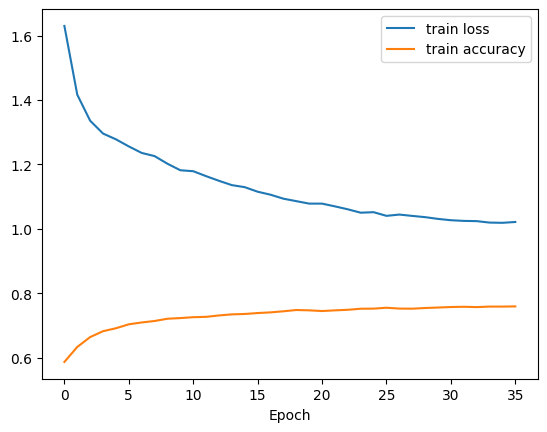

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.legend()
plt.xlabel('Epoch')

plt.show()

El código traza la gráfica de la pérdida y la precisión (accuracy) en el conjunto de entrenamiento durante el entrenamiento del modelo.

history.history devuelve un diccionario que contiene la pérdida y la precisión en el entrenamiento y validación en cada época.

history.history['loss'] devuelve una lista que contiene la pérdida en cada época del conjunto de entrenamiento.

history.history['accuracy'] devuelve una lista que contiene la precisión en cada época del conjunto de entrenamiento.

plt.plot traza ambas listas en la misma figura con el número de épocas en el eje x y la pérdida y la precisión en el eje y.

plt.legend() muestra una leyenda en la figura.

plt.xlabel agrega una etiqueta al eje x de la figura.

plt.show() muestra la figura.

# **8. Front - HTML**

In [20]:
from IPython.display import display, HTML
from google.colab import files
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image

# Código HTML para cargar una imagen



Las librerias corresponden a:

display y HTML de IPython.display para mostrar HTML y otros objetos en el cuaderno de Jupyter.

files de google.colab para interactuar con el sistema de archivos local en Google Colab.

cv2 de OpenCV para procesamiento de imágenes y visión por computadora.

numpy para operaciones matemáticas con arrays y matrices.

image de tensorflow.keras.preprocessing para la carga y preprocesamiento de imágenes antes de la alimentación al modelo.

Image de PIL para la manipulación y transformación de imágenes en formato de imagen de mapa de bits.

Saving ranita.jpg to ranita.jpg


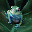

In [21]:
html_button = ''' <h1> Sube una imagen </h1> '''

display(HTML(html_button))
uploaded_files = files.upload()
uploaded_file_name = list(uploaded_files.keys())[0]

# Lee la imagen y cambia su tamaño a 32x32
img = cv2.imread(uploaded_file_name)
img_resized = cv2.resize(img, (32, 32))

# Normaliza la imagen (si es necesario para tu modelo)
img_normalized = img_resized.astype('float32') / 255.0

# Convert the image to a PIL Image object
img_pil = Image.fromarray(np.uint8(img_normalized*255.0))

# Display the image
img_pil.show()

# Convierte la imagen en un tensor de 4D (batch_size, height, width, channels)
img_tensor = image.img_to_array(img_normalized)
img_tensor = np.expand_dims(img_tensor, axis=0)


El código carga una imagen y la prepara para ser utilizada en un modelo de Deep Learning. En detalle:

La primera línea de código utiliza la función files.upload() para cargar un archivo de imagen en Colab.

La segunda línea extrae el nombre del archivo cargado.

La imagen cargada es leída por medio de la función cv2.imread() y se redimensiona a una forma de 32x32 píxeles mediante la función cv2.resize().

Luego, la imagen redimensionada se normaliza dividiéndola por 255.0, lo que la escala a un rango de valores entre 0 y 1.

La imagen normalizada se convierte en un objeto PIL Image por medio de la función Image.fromarray().

La imagen se muestra por medio de la función show() del objeto PIL Image.

La imagen normalizada se convierte en un tensor de 4D (batch_size, height, width, channels) mediante la función image.img_to_array() de Keras.

Finalmente, se agrega una dimensión adicional al tensor en el primer eje mediante la función np.expand_dims() para que coincida con la forma de entrada del modelo.

1/1 [==============================] - 0s 330ms/step


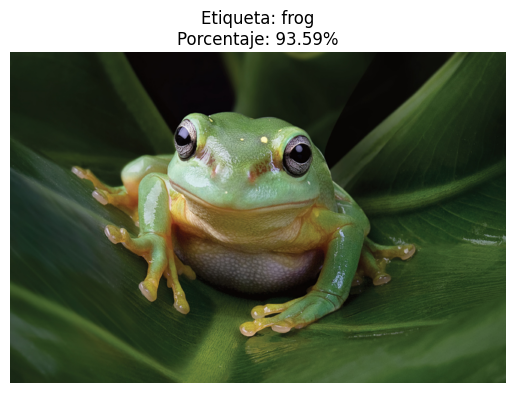

In [22]:
import matplotlib.pyplot as plt

# Realiza la predicción
predictions = model.predict(img_tensor)
predicted_class_index = np.argmax(predictions)
predicted_label = class_names[predicted_class_index]

# Calcula el porcentaje de predicción
prediction_percentage = predictions[0][predicted_class_index] * 100

# Muestra la imagen original, la etiqueta y el porcentaje de predicción
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Etiqueta: {predicted_label}\nPorcentaje: {prediction_percentage:.2f}%")
plt.axis('off')
plt.show()


El código realiza la predicción de una imagen utilizando un modelo de red neuronal convolucional previamente entrenado y muestra la imagen original junto con la etiqueta predicha y el porcentaje de confianza de la predicción.

En la primera línea, se importa la librería matplotlib para poder mostrar la imagen y la etiqueta predicha.

En la segunda línea, se realiza la predicción del modelo utilizando la imagen en forma de tensor img_tensor.

En la tercera línea, se utiliza la función np.argmax() para obtener el índice de la clase con mayor probabilidad de predicción y, por lo tanto, la etiqueta predicha.

En la cuarta línea, se obtiene el porcentaje de predicción multiplicando la probabilidad de la etiqueta predicha por 100.

En las siguientes líneas se muestra la imagen original utilizando la función plt.imshow() y se le agrega el título que incluye la etiqueta predicha y el porcentaje de predicción. Finalmente, se muestra la imagen utilizando la función plt.show().